In [3]:
import nltk
import numpy as np
import pandas as pd
import re
import string

In [12]:
df=pd.read_csv("comments.csv")

In [4]:
df.head(8)

,hotel_url,author,date,rating,title,text,sleep quality,value,cleanliness,location,rooms,service,"business service (e.g., internet access)",check in / front desk,ur_question.prompt.11,userrating.prompt.190
0,Hotel_Review-g635627-d481278-Reviews-Grand_Hot...,johnthhermit,2013-10-01T00:00:00,4.0,Comfortable Hotel,Paying the extra for a Lake view is the key to...,4.0,3.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
1,Hotel_Review-g635627-d481278-Reviews-Grand_Hot...,MatthewG154,2013-10-01T00:00:00,4.0,Good tour group hotel,When you first enter the dining room on the to...,4.0,5.0,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
2,Hotel_Review-g635627-d481278-Reviews-Grand_Hot...,H5578CTjohnd,2013-10-01T00:00:00,5.0,October 2013,My wife and I stayed at the Grand Hotel Cadena...,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
3,Hotel_Review-g635627-d481278-Reviews-Grand_Hot...,Nicki_2011_11,2013-10-01T00:00:00,4.0,Beautiful view,I stayed at this hotel in September 13 with a ...,4.0,4.0,5.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN
4,Hotel_Review-g635627-d481278-Reviews-Grand_Hot...,demoncodger,2013-10-01T00:00:00,2.0,A Big Disappointment,Very much a mixed bag. As we have come across ...,2.0,3.0,3.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN
5,Hotel_Review-g635627-d481278-Reviews-Grand_Hot...,Gennel,2013-09-01T00:00:00,3.0,Faded glory,For a Hotel refurbished 6 years ago it has age...,NaN,3.0,4.0,4.0,2.0,4.0,NaN,NaN,NaN,NaN
6,Hotel_Review-g635627-d481278-Reviews-Grand_Hot...,travelpuppy2012,2013-09-01T00:00:00,5.0,A wonderful 5-night stay!,We were in a Junior Suite from August 29 - Sep...,5.0,4.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
7,Hotel_Review-g635627-d481278-Reviews-Grand_Hot...,Eddy106,2013-09-01T00:00:00,2.0,VERY DISAPPOINTED,"We had a room on the first floor ,room 124 whi...",2.0,2.0,5.0,3.0,2.0,3.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001000 entries, 0 to 1000999
Data columns (total 16 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   hotel_url                                 1001000 non-null  object 
 1   author                                    1000600 non-null  object 
 2   date                                      1001000 non-null  object 
 3   rating                                    1001000 non-null  float64
 4   title                                     1000963 non-null  object 
 5   text                                      1001000 non-null  object 
 6   sleep quality                             459230 non-null   float64
 7   value                                     523457 non-null   float64
 8   cleanliness                               524208 non-null   float64
 9   location                                  508906 non-null   float64
 10  rooms 

In [13]:
df.drop(df.columns[[0,1,2,4,6,7,8,9,10,11,12,13,14,15]], axis=1, inplace=True)

In [14]:
df.head(8)

,rating,text
0,4.0,Paying the extra for a Lake view is the key to...
1,4.0,When you first enter the dining room on the to...
2,5.0,My wife and I stayed at the Grand Hotel Cadena...
3,4.0,I stayed at this hotel in September 13 with a ...
4,2.0,Very much a mixed bag. As we have come across ...
5,3.0,For a Hotel refurbished 6 years ago it has age...
6,5.0,We were in a Junior Suite from August 29 - Sep...
7,2.0,"We had a room on the first floor ,room 124 whi..."


In [19]:
### For Getting Rid of Neutral Comments ###
df = df[df.rating!=3.0]

# 4 -5 STARS as --> POSITIVE,1-2 STARS as --> NEGATIVE ###
df['sentiment'] = df['rating'].apply(lambda x: (x>=4 and 'Positive') or 'Negative')
df = df[['sentiment','rating','text']]
df.head(10)

,sentiment,rating,text
0,Positive,4.0,Paying the extra for a Lake view is the key to...
1,Positive,4.0,When you first enter the dining room on the to...
2,Positive,5.0,My wife and I stayed at the Grand Hotel Cadena...
3,Positive,4.0,I stayed at this hotel in September 13 with a ...
4,Negative,2.0,Very much a mixed bag. As we have come across ...
6,Positive,5.0,We were in a Junior Suite from August 29 - Sep...
7,Negative,2.0,"We had a room on the first floor ,room 124 whi..."
8,Positive,4.0,Stayed at this hotel from 28th August until 4t...
9,Positive,4.0,Having read earlier reviews of this hotel I wa...
10,Positive,4.0,Stayed for 1 week in Sept 2013. Had a room at ...


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893043 entries, 0 to 1000999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sentiment  893043 non-null  object 
 1   rating     893043 non-null  float64
 2   text       893043 non-null  object 
dtypes: float64(1), object(2)
memory usage: 27.3+ MB


In [21]:
df.sentiment.value_counts()

Positive    812885
Negative     80158
Name: sentiment, dtype: int64

In [23]:
df["text"]=df["text"].astype(str)


### Getting rid of numeric characters in text ###
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

### Getting rid of punctuation and making all letters lower ###
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) 

df["text"] = df.text.map(alphanumeric).map(punc_lower)


NameError: name 'data' is not defined

In [24]:
df

,sentiment,rating,text
0,Positive,4.0,paying the extra for a lake view is the key to...
1,Positive,4.0,when you first enter the dining room on the to...
2,Positive,5.0,my wife and i stayed at the grand hotel cadena...
3,Positive,4.0,i stayed at this hotel in september with a f...
4,Negative,2.0,very much a mixed bag as we have come across ...
...,...,...,...
1000995,Positive,4.0,hotel was in a great location in the centre of...
1000996,Positive,5.0,great location lovely staff room was perfec...
1000997,Positive,5.0,centrally located to all your essentials and a...
1000998,Positive,5.0,i have stayed at the petit palace chueca and e...


In [25]:
from nltk import SnowballStemmer

sbs = SnowballStemmer(language='english')

### Stemming is a natural language processing technique that lowers inflection in words to their root forms###

In [26]:
def stemmer(text):
    text = [sbs.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df.text = df.text.apply(stemmer)

In [27]:
df

,sentiment,rating,text
0,Positive,4.0,pay the extra for a lake view is the key to an...
1,Positive,4.0,when you first enter the dine room on the top ...
2,Positive,5.0,my wife and i stay at the grand hotel cadenabb...
3,Positive,4.0,i stay at this hotel in septemb with a frien...
4,Negative,2.0,veri much a mix bag as we have come across in...
...,...,...,...
1000995,Positive,4.0,hotel was in a great locat in the centr of mad...
1000996,Positive,5.0,great locat love staff room was perfect v...
1000997,Positive,5.0,central locat to all your essenti and attract ...
1000998,Positive,5.0,i have stay at the petit palac chueca and enjo...


In [28]:
### First Checkpoint for DF ###
df.to_csv("new_vr.csv")

In [4]:
df=pd.read_csv("new_vr.csv")

In [3]:
df = df.reset_index(drop=True)
df

,Unnamed: 0,sentiment,rating,text
0,0,Positive,4.0,pay the extra for a lake view is the key to an...
1,1,Positive,4.0,when you first enter the dine room on the top ...
2,2,Positive,5.0,my wife and i stay at the grand hotel cadenabb...
3,3,Positive,4.0,i stay at this hotel in septemb with a frien...
4,4,Negative,2.0,veri much a mix bag as we have come across in...
...,...,...,...,...
547371,547371,Negative,2.0,my wife and i went to this small resort off ca...
547372,547372,Positive,5.0,upon arriv i was so worri becaus the resort se...
547373,547373,Positive,5.0,this resort was veri beauti lush and had a lo...
547374,547374,Positive,4.0,went to zoetri villa rolandi for a long weeken...


In [5]:
df.sentiment.value_counts()

Positive    499767
Negative     47609
Name: sentiment, dtype: int64

In [6]:
from textblob import TextBlob

In [ ]:
### Correcting our sentences ### 
def correct(text):
    text = [str(TextBlob(word).correct()) for word in text.split(' ')]
    text = " ".join(text)
    return text

df.text = df.text.apply(correct)

### It takes around 13 hours and unfortunately couldn't complete! It just coverts a bit more than 60% data ###
### After process we had 547376 amount of data ###

In [7]:
### Adding Polarity Scores to Our Df ###
polarity_scores = []
for texts in df.text:
    text = TextBlob(texts)
    sentiment = text.sentiment.polarity
    polarity_scores.append(sentiment)

df['polarity'] = polarity_scores
df

,Unnamed: 0,sentiment,rating,text,polarity
0,0,Positive,4.0,pay the extra for a lake view is the key to an...,0.233204
1,1,Positive,4.0,when you first enter the dine room on the top ...,0.263472
2,2,Positive,5.0,my wife and i stay at the grand hotel cadenabb...,0.325000
3,3,Positive,4.0,i stay at this hotel in septemb with a frien...,0.354971
4,4,Negative,2.0,veri much a mix bag as we have come across in...,0.078400
...,...,...,...,...,...
547371,547371,Negative,2.0,my wife and i went to this small resort off ca...,0.165124
547372,547372,Positive,5.0,upon arriv i was so worri becaus the resort se...,0.503846
547373,547373,Positive,5.0,this resort was veri beauti lush and had a lo...,0.215487
547374,547374,Positive,4.0,went to zoetri villa rolandi for a long weeken...,0.201563


In [8]:
### Define a new sentiment column based on "polarity" ###
def determine_sentiment(polarity_score):
    if polarity_score >= 0.21:
        return 'Positive'
    elif polarity_score <= 0.20:
        return 'Negative'
    else:
        return "Neutral"

In [9]:
df['new_sentiment'] = df.polarity.apply(determine_sentiment)
df

,Unnamed: 0,sentiment,rating,text,polarity,new_sentiment
0,0,Positive,4.0,pay the extra for a lake view is the key to an...,0.233204,Positive
1,1,Positive,4.0,when you first enter the dine room on the top ...,0.263472,Positive
2,2,Positive,5.0,my wife and i stay at the grand hotel cadenabb...,0.325000,Positive
3,3,Positive,4.0,i stay at this hotel in septemb with a frien...,0.354971,Positive
4,4,Negative,2.0,veri much a mix bag as we have come across in...,0.078400,Negative
...,...,...,...,...,...,...
547371,547371,Negative,2.0,my wife and i went to this small resort off ca...,0.165124,Negative
547372,547372,Positive,5.0,upon arriv i was so worri becaus the resort se...,0.503846,Positive
547373,547373,Positive,5.0,this resort was veri beauti lush and had a lo...,0.215487,Positive
547374,547374,Positive,4.0,went to zoetri villa rolandi for a long weeken...,0.201563,Neutral


In [2]:
df

NameError: name 'df' is not defined

In [18]:
df.to_csv("latestvrsn_sent.csv")

In [15]:
df.new_sentiment.value_counts()

Positive    381740
Negative    154643
Neutral      10993
Name: new_sentiment, dtype: int64

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Step 2: Convert the text data into a numerical representation
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(df.text)
y = df.sentiment

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

# Step 4: Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Extract the coefficients of the trained model
coef = model.coef_[0]
features = vectorizer.get_feature_names()

# Step 6: Sort the coefficients by magnitude to identify the most important words
coef_sorted = sorted(zip(coef, features))
top_pos_words = [word for coef, word in coef_sorted[-10:][::-1]]
top_neg_words = [word for coef, word in coef_sorted[:10]]

print("Top positive words:", top_pos_words)
print("Top negative words:", top_neg_words)


MemoryError: Unable to allocate 1.15 MiB for an array with shape (151205,) and data type float64

In [24]:
coef = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

In [34]:
### Step 1: Convert the text data into a numerical representation ###
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(df.text)
y = df.sentiment

### Step 2: Split the data into training and test sets ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

### Step 3: Train a logistic regression model ###
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

### Step 4: Extract the coefficients of the trained model ###
coef = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

### Step 5: Sort the coefficients by magnitude to identify the most important words ###
coef_sorted = sorted(zip(coef, feature_names))
top_neg_words = [word for coef, word in coef_sorted[:25]]


print("Top negative words:", top_neg_words)

Top negative words: ['vomit', 'uneat', 'dissatisfi', 'apathet', 'pathet', 'tualip', 'poorest', 'fuzzi', 'suttl', 'unfriend', 'plead', 'brusqu', 'stunk', 'arrog', 'chore', 'atroci', 'clueless', 'filthi', 'worst', 'rundown', 'niriella', 'disgrac', 'slowest', 'overr', 'powerless']


In [ ]:
Top_Negative_Words["Vomit","Uneatable","Plead","Apathetic","Fuzz",
                   "Chore","Stunk","Rundown","Arrogance","Brusque","Clueless","Filthy"]

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [31]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

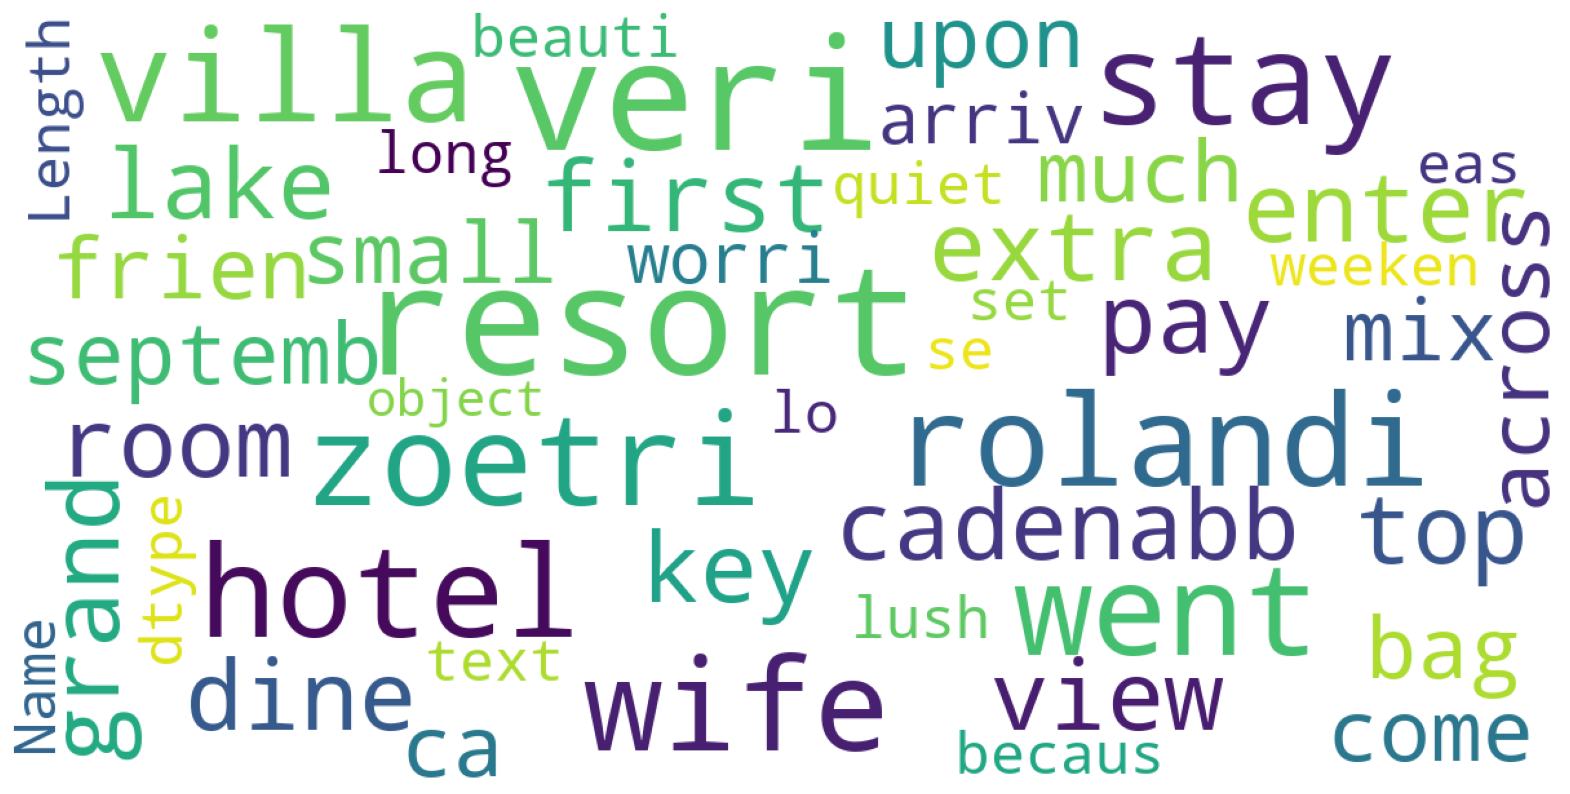

In [32]:
show_wordcloud(df["text"])

In [11]:
### Tokenization and Model Building ###
X = df.text
y = df.sentiment

### Spliting Our Data as Train and Test ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') ### Getting Rid Of Stop Words ###

### Transforming Our Data with CountVectorizer ###
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Define a func to see all model scores & confusion matrix ###

def conf_matrix(actual, predicted):
    plt.figure(figsize=[8,8])
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="YlGnBu", square=True);

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, pos_label='Negative', zero_division=1)
    recall = recall_score(actual, predicted, pos_label='Negative', zero_division=1)
    f1 = f1_score(actual, predicted, pos_label='Negative', zero_division=1)
   

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

In [12]:
### MultinomialNB algorithm works very well on comment texts ###
from sklearn.naive_bayes import MultinomialNB

mnb1 = MultinomialNB()
mnb1.fit(X_train_cv1, y_train)



y_pred_cv1_mnb = mnb1.predict(X_test_cv1)


In [43]:
### Trying Our Model with New Raw Data ###
new_reviews = ['This hotel was amazing!', 'The room was dirty and smelly.']

mnb1 = MultinomialNB()
mnb1.fit(X_train_cv1, y_train)

### Use the same vectorizer to convert the new text data into a numerical representation ###
X_new = cv1.transform(new_reviews)

### Make predictions on the new data using the trained model ###
y_pred_new = mnb1.predict(X_new)

### Print the predicted labels (for positive, for negative) ###
print(y_pred_new)


['Positive' 'Negative']


[0.9599909873152552, 0.7239213384208981, 0.8685118670328896, 0.789652301978613]

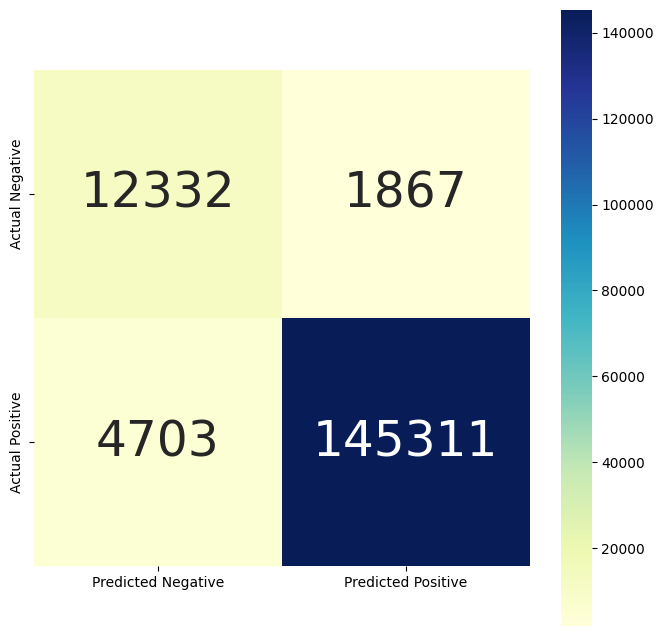

In [37]:
cm= conf_matrix(y_test, y_pred_cv1_mnb)
cm

In [40]:
results = pd.DataFrame(list(cm))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV']
results

,LR(Word)-CV
Accuracy,0.959991
Precision,0.723921
Recall,0.868512
F1 Score,0.789652


In [1]:
results

NameError: name 'results' is not defined

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

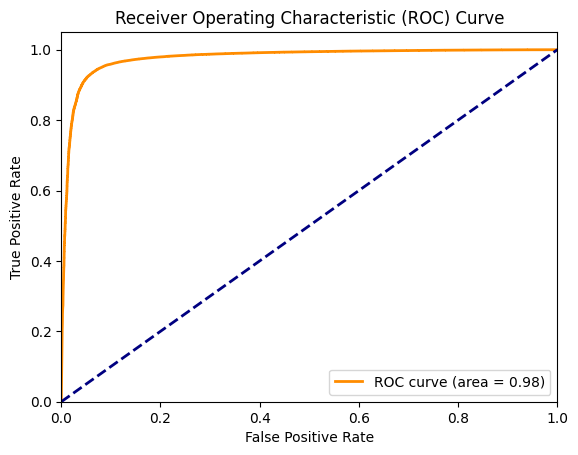

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

y_pred_log_proba = mnb1.predict_log_proba(X_test_cv1)
y_pred_proba = np.exp(y_pred_log_proba[:, 1])

le = LabelEncoder()
y_test_bin = le.fit_transform(y_test)

# Calculate the false positive rate, true positive rate, and thresholds for different probability cutoffs
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)

# Calculate the area under the ROC curve
roc_auc = roc_auc_score(y_test_bin, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
